In [4]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy import stats

In [12]:
df = pd.read_csv("Resources/application_record.csv")
df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


In [13]:
df2 = df.rename(columns={'CODE_GENDER': 'GENDER', 
                   'FLAG_OWN_CAR': 'CAR',
                   'FLAG_OWN_REALTY': 'HOUSE',
                   'AMT_INCOME_TOTAL': 'TOTAL INCOME',
                   'NAME_INCOME_TYPE': 'INCOME CATEGORY',
                   'NAME_EDUCATION_TYPE': 'EDUCATION LEVEL',
                   'NAME_FAMILY_STATUS': 'MARITAL STATUS',
                   'NAME_HOUSING_TYPE': 'WAY OF LIVING',
                   'CNT_FAM_MEMBERS': 'FAMILY SIZE'})

In [14]:
df2.head()

,ID,GENDER,CAR,HOUSE,CNT_CHILDREN,TOTAL INCOME,INCOME CATEGORY,EDUCATION LEVEL,MARITAL STATUS,WAY OF LIVING,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,FAMILY SIZE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


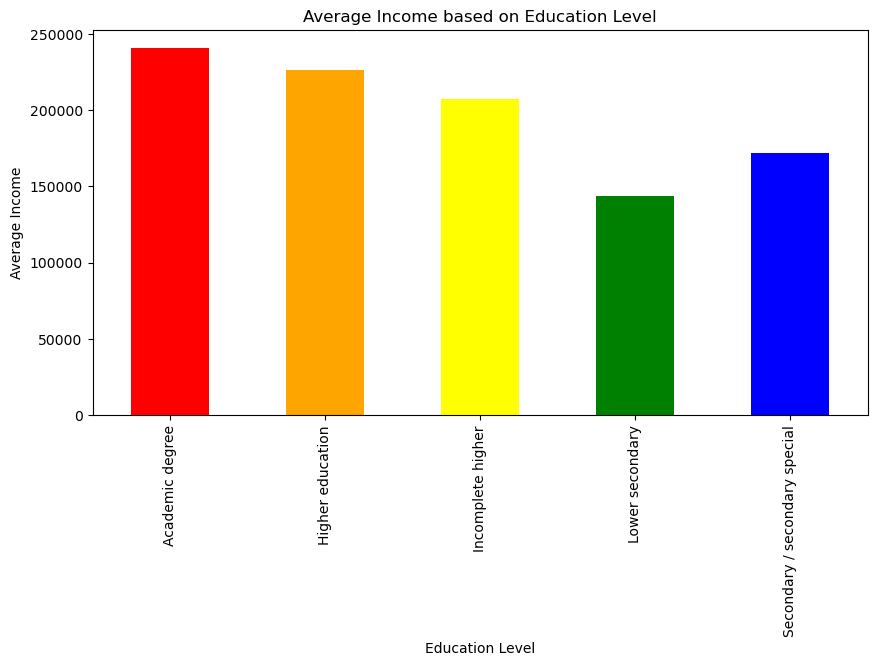

In [17]:
income_edu = df2.groupby(["EDUCATION LEVEL"])["TOTAL INCOME"].agg('mean')
ax = income_edu.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue'])
ax.set_ylabel('Average Income')
ax.set_xlabel("Education Level")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Income based on Education Level')
plt.show()


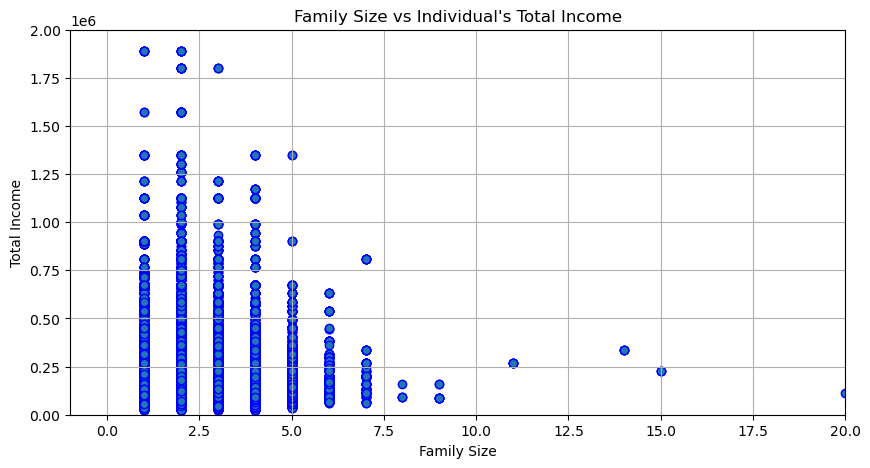

In [24]:
plt.scatter(df2["FAMILY SIZE"], df2["TOTAL INCOME"], edgecolors= "b")

#Graph Properties
plt.title("Family Size vs Individual's Total Income")
plt.xlabel("Family Size")
plt.ylabel("Total Income")
plt.xlim(-1,20)
plt.ylim(0,2000000)
plt.grid(True)

plt.show()

The r-value is: 0.00013120196539763974


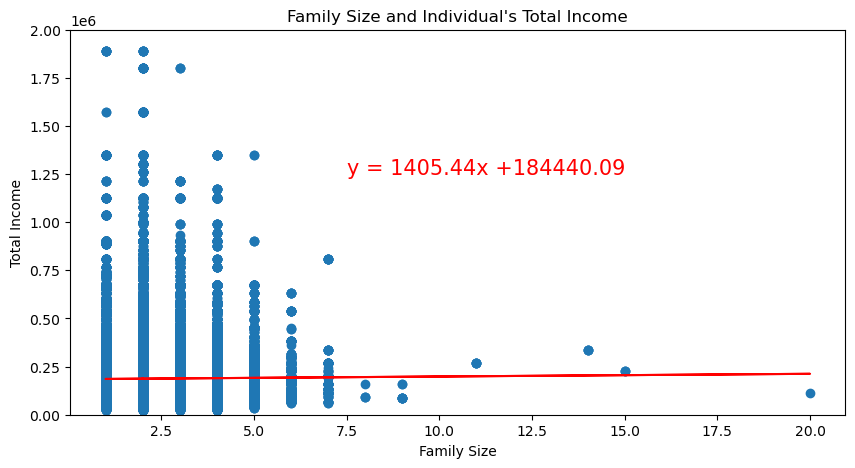

In [30]:
x_values = df2["FAMILY SIZE"]
y_values = df2["TOTAL INCOME"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.ylim(0,2000000)
plt.title("Family Size and Individual's Total Income")
plt.xlabel("Family Size")
plt.ylabel("Total Income")
plt.annotate(line_eq,(7.5,1250000),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

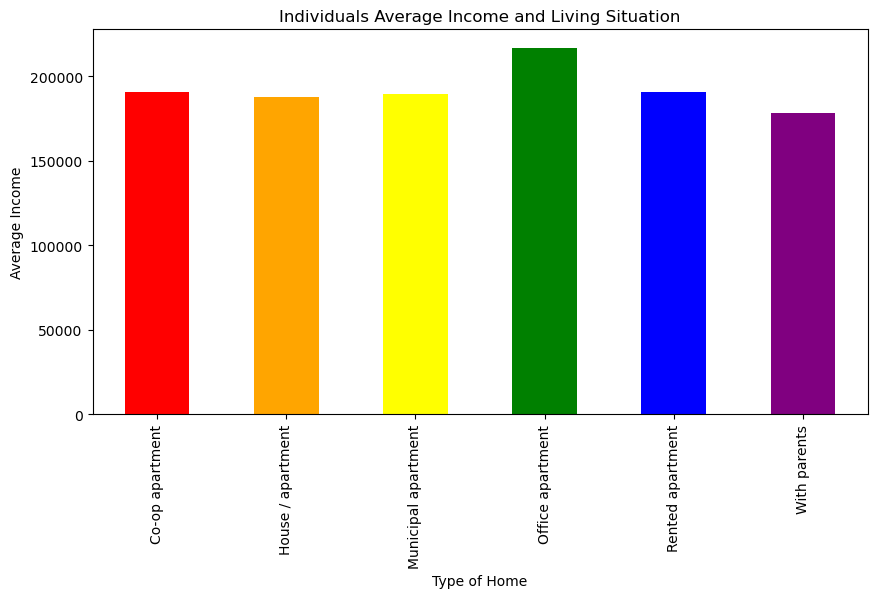

In [31]:
income_edu = df2.groupby(["WAY OF LIVING"])["TOTAL INCOME"].agg('mean')
ax = income_edu.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue', 'purple'])
ax.set_ylabel('Average Income')
ax.set_xlabel("Type of Home")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Individuals Average Income and Living Situation')
plt.show()

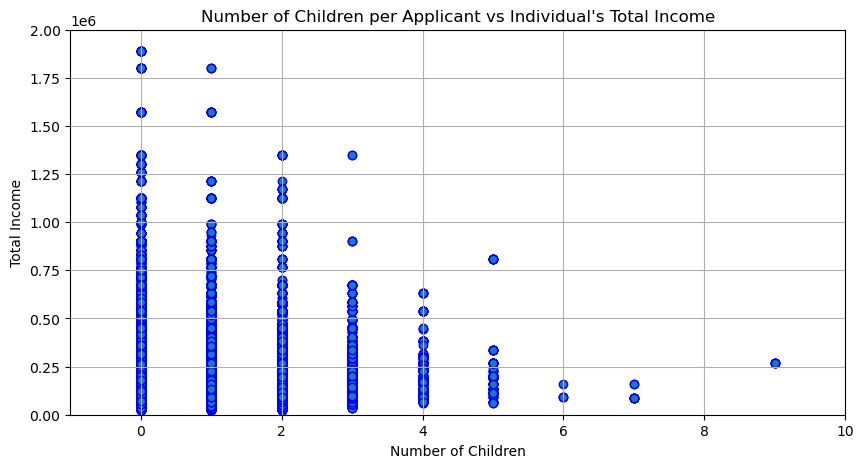

In [35]:
plt.scatter(df2["CNT_CHILDREN"], df2["TOTAL INCOME"], edgecolors= "b")

#Graph Properties
plt.title("Number of Children per Applicant vs Individual's Total Income")
plt.xlabel("Number of Children")
plt.ylabel("Total Income")
plt.xlim(-1,10)
plt.ylim(0,2000000)
plt.grid(True)

plt.show()

The r-value is: 0.0003677514678276909


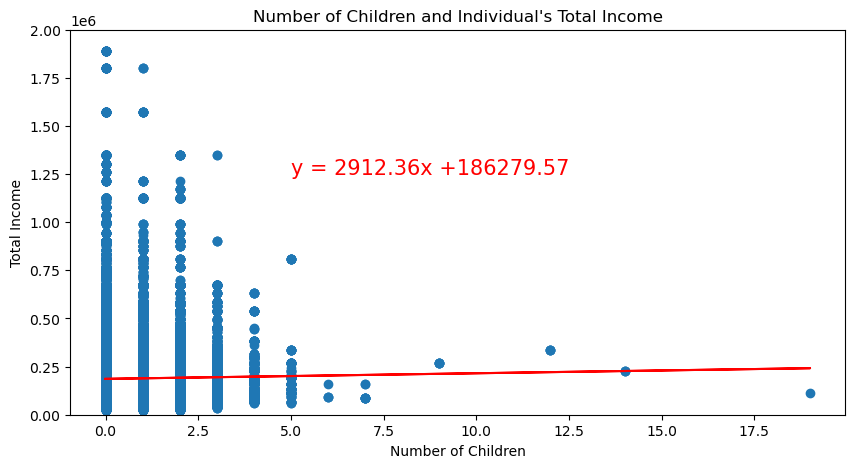

In [36]:
x_values = df2["CNT_CHILDREN"]
y_values = df2["TOTAL INCOME"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values, "r-")

plt.ylim(0,2000000)
plt.title("Number of Children and Individual's Total Income")
plt.xlabel("Number of Children")
plt.ylabel("Total Income")
plt.annotate(line_eq,(5,1250000),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

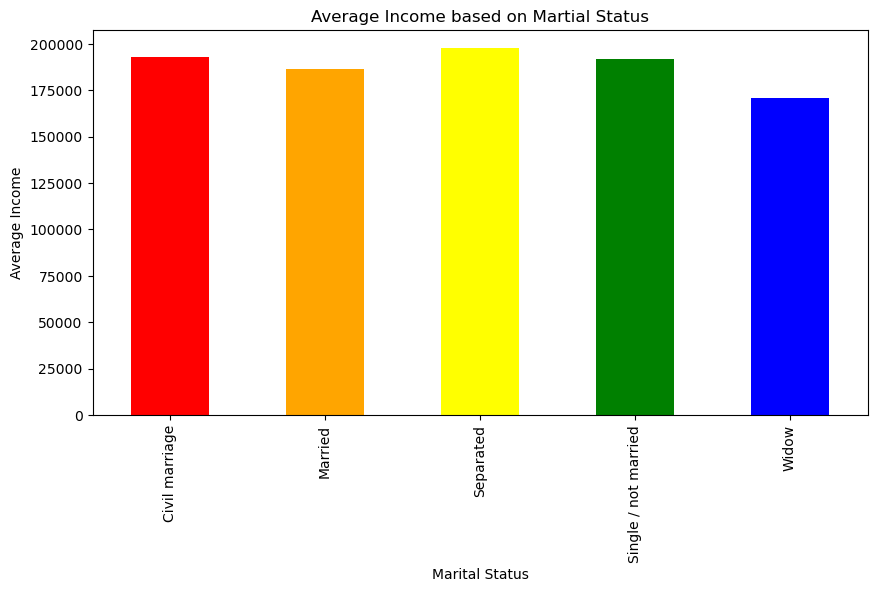

In [37]:
income_edu = df2.groupby(["MARITAL STATUS"])["TOTAL INCOME"].agg('mean')
ax = income_edu.plot(kind = "bar", color=['red', 'orange', 'yellow', 'green', 'blue'])
ax.set_ylabel('Average Income')
ax.set_xlabel("Marital Status")
plt.rcParams['figure.figsize'] = [10, 5]
plt.title('Average Income based on Martial Status')
plt.show()